# COMP4318 & 5318 - Machine Learning and Data Mining: Assignment 1

Due: Sunday Week 7 - Sep 15th, 2024 11:59PM

# 1. Summary

In this assignment, you are tasked with the challenge of developing machine learning (ML) classifiers capable of categorizing grayscale images into predefined classes. Your task involves employing various classification algorithms to identify which is most effective and efficient in processing image data. Additionally, you are required to document your methodologies and findings in a detailed report. The total score for this assignment is allocated as follows:

1. Code: max 65 points
2. Report: max 35 points

Detailed about assignment specifcations and scoring criteria can be found in the assignment page on Canvas (Assignments $\rightarrow$ Assignment 1 - Specification). The sections below provide comprehensive information on the assignment tasks and guidelines for submission.

# 2. Dataset description


The dataset for this assignment is derived from the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a collection of fashion articles represented as grayscale images. This dataset can be downloaded from Canvas. The dataset consists of a training set of 30,000 examples and a test set of 5,000 examples. They belong to 10 different categories. The validation set is not provided, but you can randomly pick a subset of the training set for validation. Your prediction over the test set must be submitted to Kaggle to receive the public accuracy over first 2,000 examples, you will use this accuracy to analyse the performance of your proposed method. It is NOT allowed to use any examples from the test set for training; or it will be considered as cheating. The rest 3,000 labels of the test set are reserved for marking purpose.

Data samples are categorized into the following ten classes:

- 0: T-shirt/Top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot


Below are visual examples of the dataset, showcasing samples from each category:

<img src="https://www.researchgate.net/publication/346405197/figure/fig3/AS:962581560848384@1606508736352/Examples-of-Fashion-MNIST-dataset.ppm" alt="DataSet" title="DataSet" width=500/>

The dataset can be downloaded from the Assignment 1 page on Canvas. Note that only a subset of the original Fashion-MNIST dataset is provided for this assignment. You must use the specific files supplied in the assignment materials for training and testing.

# 3. Data Preparation

The required `data` files are in the data folder, downloadable as a zip from the Assignment 1 - Specification page on Canvas. Extract the files into your working directory. The folder includes:

- `train.csv`: 30,000 labeled samples for training, evaluation, and model selection.
- `test1.csv`: 2,000 labeled samples for model efficiency testing (Canvas submission).
- `test2.csv`: 5,000 unlabeled samples for Kaggle evaluation.
- `sample.csv`: A sample prediction file format for Kaggle submission (`test_output.csv`).

Use Python's pandas library to load these CSV files into DataFrames, ensuring they are under the `./data/` directory.

## 3.1 Loading data

Use the following Python code to load the training data:  

In [53]:
import pandas as pd
import os
print(os.listdir("./data"))
pd.set_option('display.max_columns', 10)

['sample.csv', 'test1.csv', 'test2.csv', 'train.csv']


In [54]:
# train.csv including feature and label using for training model.
data_train_df = pd.read_csv('./data/train.csv') 

# import test dataset
data_test = pd.read_csv('./data/test1.csv')

# kaggle test data set
kaggle_test = pd.read_csv('./data/test2.csv')

In [55]:
# print out the first 5 rows of the training dataframe
data_train_df.head()

,id,v1,v2,v3,v4,...,v781,v782,v783,v784,label
0,1,0,0,0,0,...,0,0,0,0,6
1,2,0,0,0,0,...,0,0,0,0,7
2,3,0,0,0,0,...,0,0,0,0,4
3,4,0,0,0,0,...,0,0,0,0,7
4,5,0,0,0,0,...,0,0,0,0,3


In [56]:
data_test.head()

,id,v1,v2,v3,v4,...,v781,v782,v783,v784,label
0,1,0,0,0,0,...,0,0,0,0,3
1,2,0,0,0,0,...,0,0,0,0,7
2,3,0,0,0,0,...,0,0,0,0,3
3,4,0,0,1,0,...,0,0,0,0,0
4,5,0,0,0,0,...,0,0,0,0,9


In [57]:
kaggle_test.head()

,id,v1,v2,v3,v4,...,v780,v781,v782,v783,v784
0,1,0,0,0,0,...,0,0,0,0,0
1,2,0,0,0,0,...,0,0,0,0,0
2,3,0,0,0,0,...,0,0,0,0,0
3,4,0,0,1,0,...,0,0,0,0,0
4,5,0,0,0,0,...,0,0,0,0,0


Then data would be a dataframe with 30,000 samples including 784 features (from v1 to v784) and its label.

In [58]:
# Selecting input feature
# Here, data_train_feature is not a datafram, it is an numpy array
data_train_feature = data_train_df.loc[:, "v1":"v784"].to_numpy()

data_test_feature = data_test.loc[:, "v1":"v784"].to_numpy()

data_kaggle_feature = kaggle_test.loc[:, "v1":"v784"].to_numpy()

# Selecting output lable for training and testing data set
Y_train = data_train_df.label.to_numpy()

Y_test = data_test.label.to_numpy()

Showing a sample data. The first example belongs to class 2: Pullover

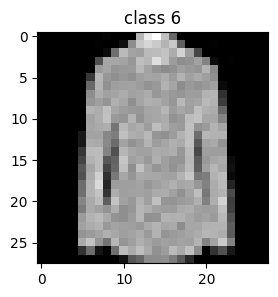

In [59]:
import matplotlib.pyplot as plt
# 这里变成3-D数据了
data_train_feature_3D = data_train_feature.reshape((data_train_feature.shape[0], 28, 28))
plt.figure(figsize=(3,3))
plt.imshow(data_train_feature_3D[0], cmap=plt.get_cmap('gray'))
plt.title("class " + str(Y_train[0]))
plt.show()

# 4. Task Description

## 4.1 Code

You will now explore and build diffferent ML models for the given dataset. You are required to implement at least **FOUR** models, which should include THREE from the following methods:

1. Nearest Neighbor
2. Logistic Regression
3. Naïve Bayes 
4. Decision Tree
5. SVM

and ONE of these ensemble methods:
    
 1. Bagging
 2. Boosting
 3. Random forest
    

For these implementations, you may use established packages and libraries that have been introduced in the tutorials such as sklearn or create your own custom solutions from scratch.

Your code must be easily readable and well commented. The following are expected to be satisfied:

- **Readability & Consistency**: Easy to read, and consistent in style
  
- **Coding Descriptions & Comments**: Descriptions and comments clarify meaning where needed
  
- **Robustness**: Handles erroneous or unexpected input 

It should follow the structure below.

### 4.1.1 Environment Setup

Install and import necessary packages and libraries used in your coding environment. It is recommended to specify their versions to ensure reproducibility.

In [60]:
# TODO: Install and import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
%matplotlib inline

np.random.seed(481)

Define any necessary utility or helper functions (e.g., for plotting, optimization, etc.) if applicable.

In [61]:
# TODO: Define helper function (e.g. plotting) if applicable

### 4.1.2 Data Preprocessing

Implement at least ONE preprocessing technique on the dataset before model training. Possible methods include **Normalization**, **Dimensionality Reduction**, etc.

In [62]:
# Firstly, let's clean the data, delete missing value, 
print("Before delete missing value:",data_train_df.shape)
data_train_df = data_train_df.dropna()
print(f"After delete missing value:",data_train_df.shape)

Before delete missing value: (30000, 786)
After delete missing value: (30000, 786)


We can see that, there is no missing value inside "data_train_df" (so we need not to reassign "data_train_feature"). After the clean step, we can now preprocess the data. Here, I choose to use Normalization method. The reason I choose to use this method is that Logistic Regression uses gradient descent to minimize the loss function. And gradient is greatly affected by features' value. In addition, Naive Bayes can directly process numeric data (by using pdf). Lastly, there is no class for each attribute, so Decision Tree method also need not to preprocess the data.

In [63]:
# scaler = StandardScaler() # standardization
scaler = MinMaxScaler()

pca = PCA(n_components=0.95)  # 保留95%的方差

# 请注意，scaler.fit() 只在训练数据上调用，因为你需要使用训练数据的统计信息（均值和标准差）
# 来转换测试数据和 Kaggle 数据，以确保数据处理的一致性。
scaler.fit(data_train_feature)

# apply normalisation to the training set
#  classifier(x) --> y
X_train = scaler.transform(data_train_feature)
print("Standaidization feature shape:", X_train.shape)
X_train = pca.fit_transform(X_train)
print("PCA feature shape:", X_train.shape)

Standaidization feature shape: (30000, 784)
PCA feature shape: (30000, 187)


In [64]:
# We also need to normalize testing data
X_test = scaler.transform(data_test_feature)
print("Standaidization feature shape:", X_test.shape)
# 这里使用transform是因为之前已经使用training data fit过PCA了
X_test = pca.transform(X_test)
print("PCA feature shape:", X_test.shape)

X_kaggle = scaler.transform(data_kaggle_feature)

Standaidization feature shape: (2000, 784)
PCA feature shape: (2000, 187)


### 4.1.3 Model 1 (Knn)

Implement and fine-tune the hyperparameters for Model 3. 

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train, Y_train)
print("Accuracy on train set: {:.2f}".format(knn.score(X_train, Y_train)*100))
print("Accuracy on test set: {:.2f}".format(knn.score(X_test, Y_test)*100))

Accuracy on train set: 89.53
Accuracy on test set: 85.70


In [66]:
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],         # 邻居数量
    'weights': ['uniform', 'distance'],      # 权重
    'metric': ['euclidean', 'manhattan']     # 距离度量方法
}

start_time = time.time()

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, verbose=2, n_jobs=-1)
grid_search_knn.fit(X_train, Y_train)


end_time = time.time()
knn_training_time = end_time - start_time

print("Train set score: {:.2f}".format(grid_search_knn.score(X_train, Y_train)*100))
print("Test set score: {:.2f}".format(grid_search_knn.score(X_test, Y_test)*100))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Train set score: 100.00
Test set score: 86.60


### 4.1.4 Model 2 (Logistic Regression)

#### Implementation

In [67]:
from sklearn.linear_model import LogisticRegression


start_time = time.time()

logreg = LogisticRegression(max_iter=4000)
logreg.fit(X_train, Y_train)

end_time = time.time()
logreg_training_time = end_time - start_time

print("Accuracy on trainig set:", logreg.score(X_train, Y_train)*100)
print("Accuracy on test set:", logreg.score(X_test, Y_test)*100)

Accuracy on trainig set: 86.46333333333334
Accuracy on test set: 85.8


In [68]:


# 超参数组合数 2*2*2*2 = 16
param_grid_lg = {
    'C': [1.0, 5],  # 正则化强度: 较大的 C值对应于较小的正则化强度。它意味着模型对训练数据的拟合程度较高，即允许较小的正则化，模型会更倾向于减少训练数据上的误差。
    'solver': ['liblinear', 'lbfgs', 'saga'],  # 求解器
    'penalty': ['l2','l1','elasticnet'],  # 正则化方式（L2）
    'max_iter': [4000, 6000]  # 最大迭代次数
}

logreg_2 = LogisticRegression()
grid_search_lg = GridSearchCV(logreg_2, param_grid_lg, cv=3, return_train_score=True, n_jobs= 2, verbose=2)

grid_search_lg.fit(X_train, Y_train)

print("Train set score: {:.2f}".format(grid_search_lg.score(X_train, Y_train)*100))
print("Test set score: {:.2f}".format(grid_search_lg.score(X_test, Y_test)*100))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


c:\Users\slh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
72 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\slh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\slh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\slh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line

Train set score: 86.46
Test set score: 85.80


#### Hyper-parameters Tuning

Enhance your model by fine-tuning its hyperparameters. Use techniques such as grid search combined with k-fold cross-validation to systematically identify the optimal parameter set.

### 4.1.5 Model 3 (Naïve Bayes)

Implement and fine-tune the hyperparameters for Model 2 (using the same approach as Model 1). 

In [69]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, Y_train)
# y_pred = nb.predict(X_test)

# 图片中相邻像素点关联性比较强，而NB又假设每个都是independent，所以结果不理想
print("Accuracy on train set: {:.3f}".format(nb.score(X_train, Y_train)*100))
print("Accuracy on test set: {:.3f}".format(nb.score(X_test, Y_test)*100))

Accuracy on train set: 74.560
Accuracy on test set: 77.050


In [70]:
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

start_time = time.time()

grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=5, verbose=2, n_jobs=-1)
grid_search_nb.fit(X_train, Y_train)

end_time = time.time()
nb_training_time = end_time - start_time

print("Train set score: {:.2f}".format(grid_search_nb.score(X_train, Y_train)*100))
print("Test set score: {:.2f}".format(grid_search_nb.score(X_test, Y_test)*100))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train set score: 74.59
Test set score: 77.05


### 4.1.6 Model 4 (Decision Trees)

Implement and fine-tune the hyperparameters for Model 4. 

In [71]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', random_state=481)
tree.fit(X_train, Y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, Y_train)*100))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, Y_test)*100))

Accuracy on training set: 100.000
Accuracy on test set: 76.000


In [72]:
# TODO: Grid research
param_grid_tree = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4]
    # 'criterion': ['gini', 'entropy']
}

start_time = time.time()

grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5, verbose=2, n_jobs=-1, return_train_score=True)
grid_search_tree.fit(X_train, Y_train)

end_time = time.time()
tree_training_time = end_time - start_time

print("Train set score: {:.2f}".format(grid_search_tree.score(X_train, Y_train)*100))
print("Test set score: {:.2f}".format(grid_search_tree.score(X_test, Y_test)*100))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Train set score: 83.10
Test set score: 77.00


### 4.1.7 Model 5 (SVM)

In [73]:


lin_svm = SVC(kernel="linear")
lin_svm.fit(X_train, Y_train)
print("Train set score: {:.3f}".format(lin_svm.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(lin_svm.score(X_test, Y_test)*100))

poly_svm = SVC(kernel="poly", degree=2)
poly_svm.fit(X_train, Y_train)
print("Train set score: {:.3f}".format(poly_svm.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(poly_svm.score(X_test, Y_test)*100))


start_time = time.time()

rbf_svm = SVC(kernel="rbf", gamma="auto")
rbf_svm.fit(X_train, Y_train)
print("Train set score: {:.3f}".format(rbf_svm.score(X_train, Y_train)*100))
print("Test set score: {:.2f}".format(rbf_svm.score(X_test, Y_test)*100))

end_time = time.time()
svm_training_time = end_time - start_time


Train set score: 0.884
Test set score: 86.45
Train set score: 0.902
Test set score: 89.05
Train set score: 87.807
Test set score: 88.45


In [74]:
rbf_svm_2 = SVC(kernel="rbf", C=0.5,gamma="auto")
rbf_svm_2.fit(X_train, Y_train)
print("Train set score: {:.3f}".format(rbf_svm_2.score(X_train, Y_train)*100))
print("Test set score: {:.2f}".format(rbf_svm_2.score(X_test, Y_test)*100))

Train set score: 86.263
Test set score: 87.60


### 4.1.8 Model 6 (Bagging)

In [75]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    tree, n_estimators=10, bootstrap=True, random_state=481)

bag_clf.fit(X_train, Y_train)
print("Bagging ensemble of decision trees - accuracy on train set: {:.3f}".format(bag_clf.score(X_train, Y_train)*100))
print("Bagging ensemble of decision trees - accuracy on test set: {:.3f}".format(bag_clf.score(X_test, Y_test)*100))

Bagging ensemble of decision trees - accuracy on train set: 99.283
Bagging ensemble of decision trees - accuracy on test set: 84.300


In [76]:
param_grid_bagging = {
    'estimator__max_depth': [3, 5, 10, None],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    # 'base_estimator__criterion': ['gini', 'entropy'],
    # 'n_estimators': [10, 50, 100],  # Bagging中的基学习器数量，更多的基学习器通常能提升模型的表现，但训练时间也会增加。
    'max_samples': [0.5, 0.7] # 每个基学习器使用的样本比例, int表示抽取固定的数量，float表示抽取百分比的数量
    # 'bootstrap': [True, False],     # 是否使用有放回的抽样
}

start_time = time.time()

grid_search_bagging = GridSearchCV(bag_clf, param_grid_bagging, cv=3, verbose=2, n_jobs=-1)
grid_search_bagging.fit(X_train, Y_train)

end_time = time.time()
bagging_training_time = end_time - start_time

print("Train set score: {:.3f}".format(grid_search_bagging.score(X_train, Y_train)*100))
print("Test set score: {:.2f}".format(grid_search_bagging.score(X_test, Y_test)*100))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Train set score: 95.597
Test set score: 84.15


### 4.1.9 Model 7 (Ada Boosting)

In [77]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(criterion='entropy', max_depth=1), n_estimators=200, learning_rate=0.5, random_state=481, algorithm='SAMME')

start_time = time.time()

ada_clf.fit(X_train, Y_train)

end_time = time.time()
ada_training_time = end_time - start_time

print("Train set score: {:.3f}".format(ada_clf.score(X_train, Y_train)*100))
print("Test set score: {:.2f}".format(ada_clf.score(X_test, Y_test)*100))

Train set score: 52.460
Test set score: 51.80


### 4.2.0 Model 8 (Gradient Boosting)

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

start_time = time.time()

gb_clf = GradientBoostingClassifier(max_depth=1, n_estimators=200, learning_rate=0.2, random_state=481)
gb_clf.fit(X_train, Y_train)

end_time = time.time()
gradient_training_time = end_time - start_time

print("Train set score: {:.3f}".format(gb_clf.score(X_train, Y_train)*100))
print("Test set score: {:.2f}".format(gb_clf.score(X_test, Y_test)*100))

Train set score: 85.940
Test set score: 84.95


### 4.2.1 Model 9 (Random Forests)

In [79]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(criterion='entropy', n_estimators=500, max_leaf_nodes=16, random_state=481)

start_time = time.time()

rnd_clf.fit(X_train, Y_train)

end_time = time.time()
rf_training_time = end_time - start_time

print("Train set score: {:.3f}".format(rnd_clf.score(X_train, Y_train)*100))
print("Test set score: {:.2f}".format(rnd_clf.score(X_test, Y_test)*100))

Train set score: 76.007
Test set score: 76.55


### 4.1.7 Evaluation

Evaluate the best version of each model using appropriate classification performance metrics on the validation set and test on `test1.csv`. 
Ensure that the results are visualized using high-quality plots, figures, or tables to clearly demonstrate model performance.

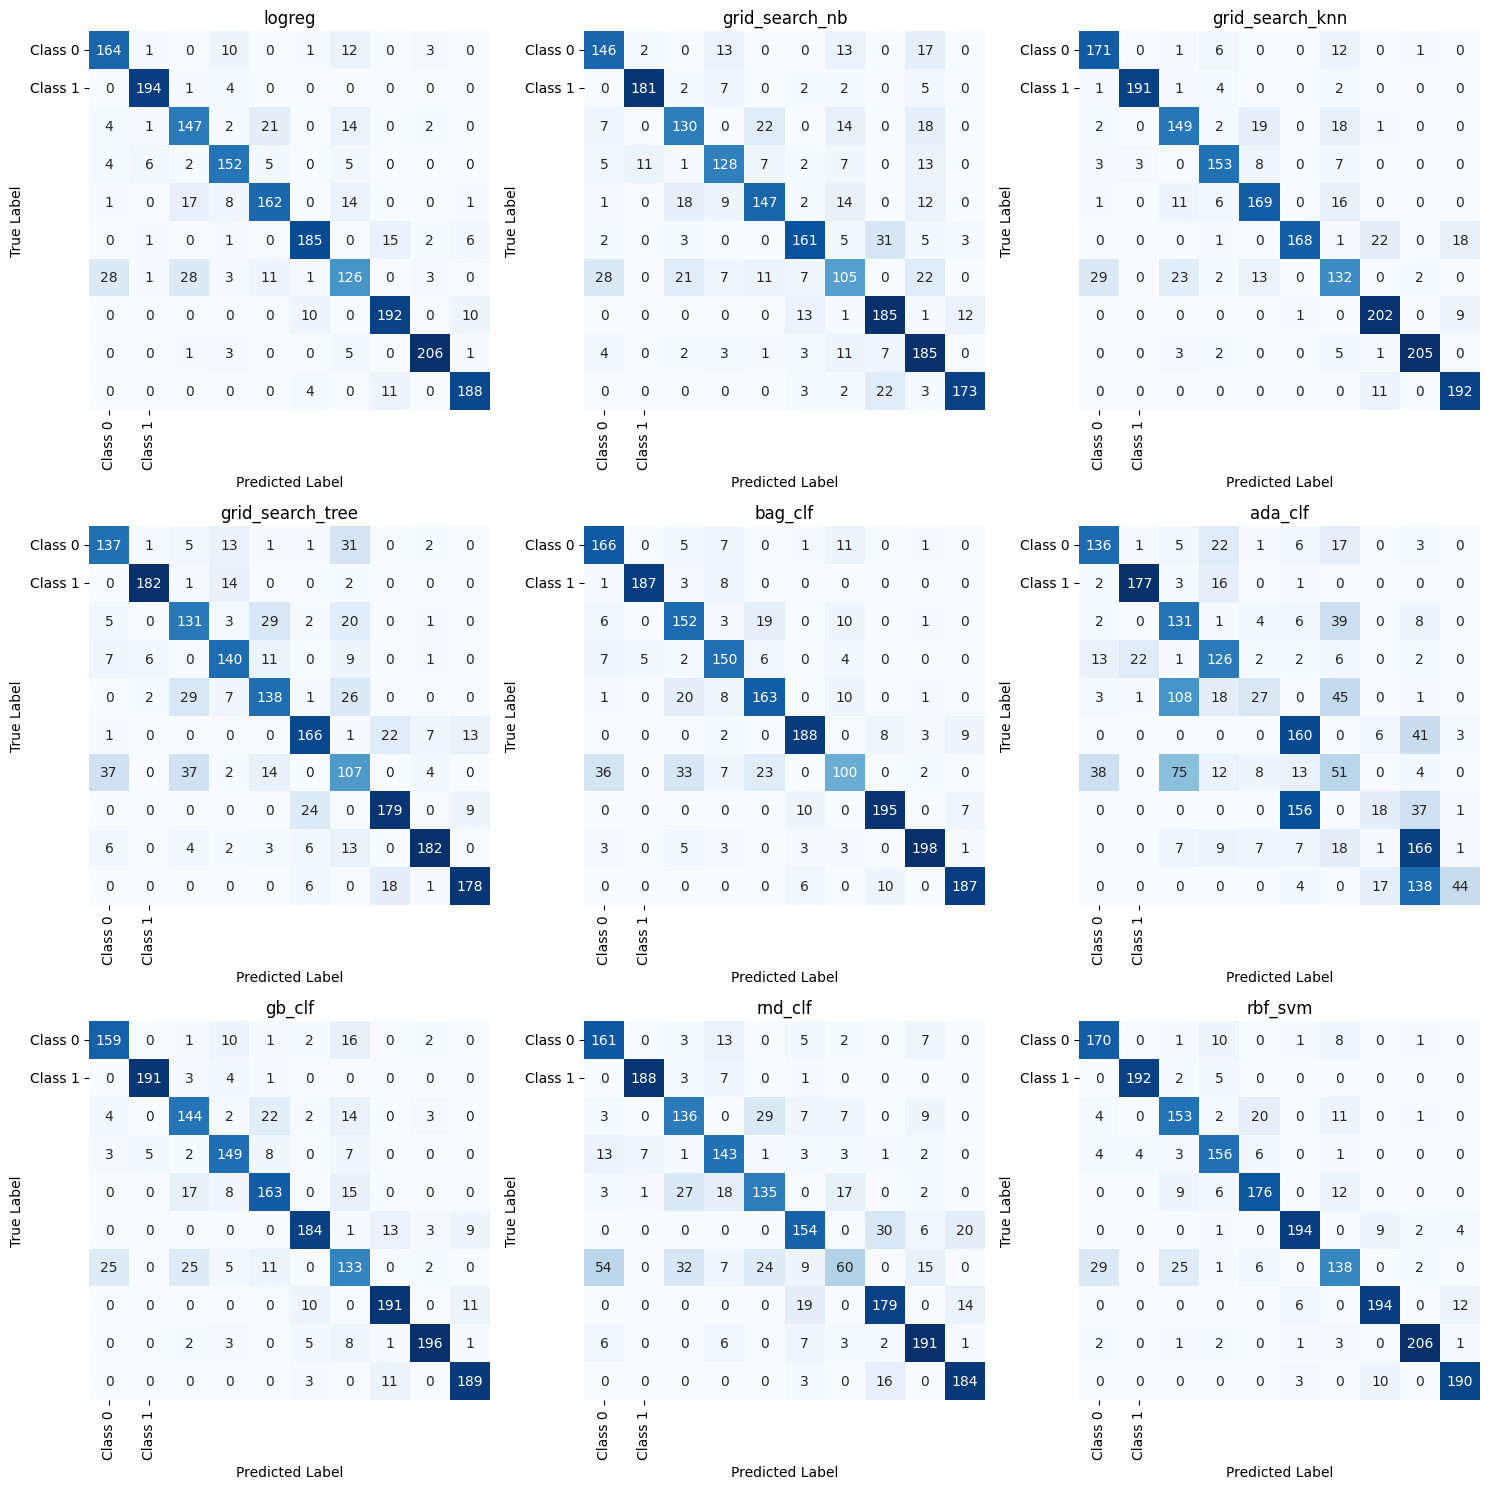

In [80]:
# 对比每个模型使用 test 进行consusion matrix 的评估
from sklearn import metrics
import seaborn as sns

y_preds=[logreg.predict(X_test),
        grid_search_nb.predict(X_test),
        grid_search_knn.predict(X_test),
        grid_search_tree.predict(X_test),
        bag_clf.predict(X_test),
        ada_clf.predict(X_test),
        gb_clf.predict(X_test),
        rnd_clf.predict(X_test),
        rbf_svm.predict(X_test)]

models =["logreg",
            "grid_search_nb",
            "grid_search_knn",
            "grid_search_tree",
            "bag_clf",
            "ada_clf",
            "gb_clf",
            "rnd_clf",
            "rbf_svm"]

def plot_confusion_matrices(y_test, y_preds, model_names):
    # 创建一个 3x3 的子图网格
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()  # 使其成为一维数组，以便于迭代

    # 绘制每个模型的混淆矩阵
    for i, (y_pred, ax, model_name) in enumerate(zip(y_preds, axes, model_names)):
        # Mainly refer to this website: https://medium.com/@MudSnail/the-importance-of-logistic-regression-in-image-classification-1966d07e7a0c
        cm = metrics.confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, 
                    cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
        ax.set_title(model_name)
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')

    # 调整布局
    plt.tight_layout()
    plt.show()

# 示例调用
plot_confusion_matrices(Y_test, y_preds, models)


### 4.1.8 Comparison

Compare all classifiers with their optimized hyper-parameters, focusing on criteria such as classification performance, training time, and inference time. Visualization of these comparisons is required; use high-quality plots, figures, or tables to facilitate a clear understanding of the differences and strengths of each model.

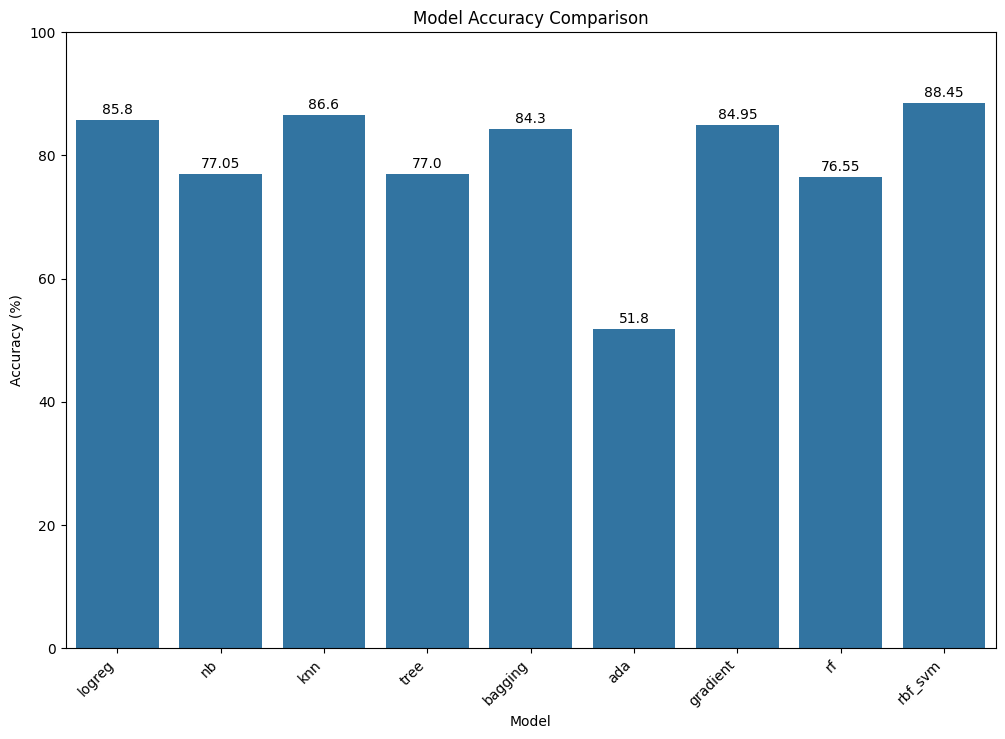

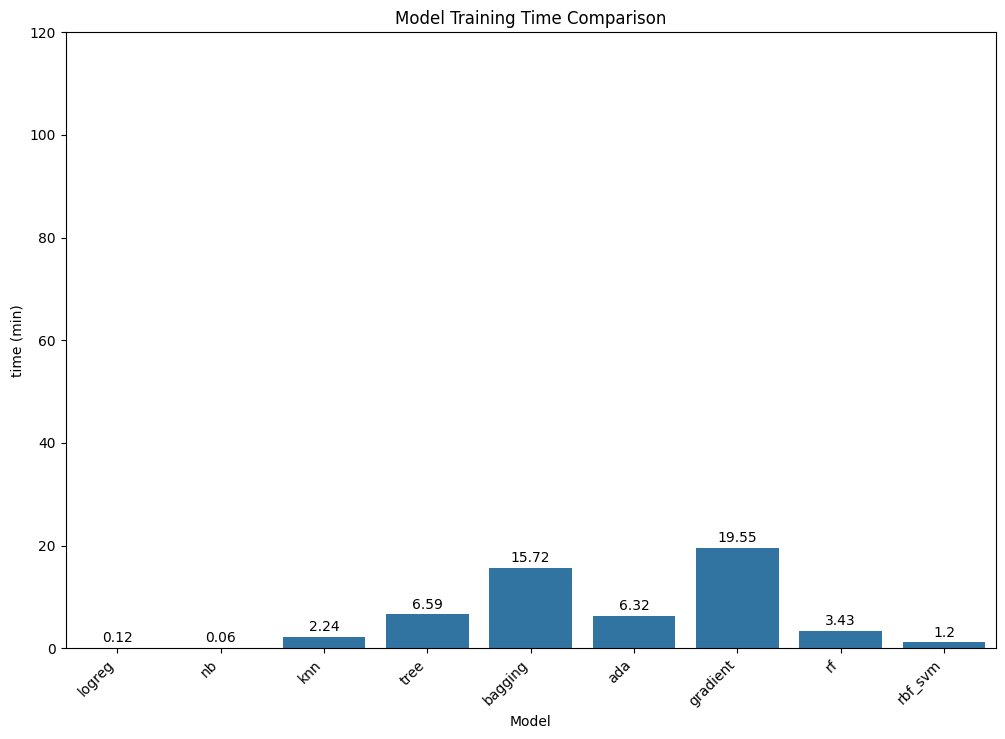

In [81]:
# TODO: Compare performance of all models
import seaborn as sns

model_accuracies = {
    'logreg': logreg.score(X_test, Y_test)*100,
    'nb': grid_search_nb.score(X_test, Y_test)*100,
    'knn': grid_search_knn.score(X_test, Y_test)*100,
    'tree': grid_search_tree.score(X_test, Y_test)*100,
    'bagging': bag_clf.score(X_test, Y_test)*100,
    'ada': ada_clf.score(X_test, Y_test)*100,
    'gradient': gb_clf.score(X_test, Y_test)*100,
    'rf': rnd_clf.score(X_test, Y_test)*100,
    "rbf_svm" : rbf_svm.score(X_test, Y_test)*100
}

accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy (%)'])

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Accuracy (%)', data=accuracy_df)

for index, row in accuracy_df.iterrows():
    plt.text(index, row['Accuracy (%)'] + 0.5, round(row['Accuracy (%)'], 2), 
             color='black', ha="center", va="bottom")

plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')  # 旋转 x 轴标签以适应长模型名称
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # 设置 y 轴范围
plt.show()

model_time = {
    'logreg': logreg_training_time/60,
    'nb': nb_training_time/60,
    'knn': knn_training_time/60,
    'tree': tree_training_time/60,
    'bagging': bagging_training_time/60,
    'ada': ada_training_time/60,
    'gradient': gradient_training_time/60,
    'rf': rf_training_time/60,
    "rbf_svm" : svm_training_time/60
}

time_df = pd.DataFrame(list(model_time.items()), columns=['Model', 'time (min)'])

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='time (min)', data=time_df)

for index, row in time_df.iterrows():
    plt.text(index, row['time (min)'] + 0.5, round(row['time (min)'], 2), 
             color='black', ha="center", va="bottom")

plt.title('Model Training Time Comparison')
plt.xticks(rotation=45, ha='right')  # 旋转 x 轴标签以适应长模型名称
plt.xlabel('Model')
plt.ylabel('time (min)')
plt.ylim(0, 120)  # 设置 y 轴范围
plt.show()

### 4.1.9 The Best Classifier

Conclude the best classifier

In [ ]:
# TODO: Train and test the classifier which has the best performance

### 4.1.10 Loading testing data

Load the testing data for prediction

In [ ]:
# test2.csv includes 5000 samples used for label prediction. Test samples do not have labels.
data_test_df = pd.read_csv('./data/test2.csv', index_col=0)

In [ ]:
# print out the first 5 rows of the test dataframe
data_test_df.head()

Use the your best classifier to make predictions for the test data. The predictions should be stored in a vector named `output`, with a length of 5000.

In [ ]:
# TODO: Use your best classifier to make predictions on unseen data. The output of this code must be a vector named 'output' of length 5000

Save your prediction vector as a `test_output.csv` file, which contains two columns: `id` and `label`. Please refer to the `example_output.csv` for the structure of this output file. 

In [ ]:
output_df = pd.DataFrame(output, columns = ['label'])
output_df.to_csv('./test_output.csv', sep=",", float_format='%d',index_label="id")

## 4.2 Report

The report must be structured into the following key sections:

1. **Introduction**: Provide a comprehensive overview of the dataset, outline the methods chosen, and summarize the key findings and results.
2. **Methodology**: Describe pre-processing techniques and ML algorithms employed in this assignment. Include a discussion of the theoretical principles underlying each method and explain the rationale behind your choices.
3. **Result and Discussion**: Detail the experimental settings (e.g., implementation strategies, hyperparameter finetuning strategies, etc.). Present the results obtained from the selected algorithms and discuss their implications. Compare the performance of all models, considering factors such as accuracy, model complexity, training time, and inference time. Employ high-quality plots, figures, and tables to visually support and enhance the discussion of these results.
4. **Conclusion**: Summarize your main findings, mention any limitations methods and results and suggest potential directions for future works.
5. **References**: include the references cited in your report in a consistent format.

##### Important Notes

- The maximum length of the main report is 8 pages (excluding appendix and references).

-  You must include an appendix that clearly provides the instructions on how to setup the environment to run your code, especialy the installation guide and version of any external packages and
libraries used for implementation. In addition, you should include the hardware configurations used for the coding environment.

- The report must be in PDF format. Make sure the report is well-structured, easy to read, and that it presents your findings in a logical and organized way.


# 5. Submission Guidelines

## 5.1 Group Registration

For this assignment, you can work in groups of TWO. Please register your group under *People → Group → A1.1-Group* or *People → Group → A1.2-Group* on Canvas (We have created two separate group sets to accommodate the large number of students enrolled in this course).  

**The group registration should be done by Friday, Aug 30th, 2024.**

## 5.2 Submit your work

### 5.2.1 Submit to Kaggle

We use the Kaggle leaderboard for evaluating the results predicted by your models on unseen data. Follow the steps below to submit your work to the Kaggle leaderboard.

Kaggle link: [https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/](https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/)

1. Use the [Kaggle link](https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/) to join the competition, you need to create a Kaggle account if you don’t
have one.

2. Go to Team $\rightarrow$ Use your registered Group ID on Canvas as your team name (e.g., `A1.1-Group 1`). You can create a Kaggle team with up to 2 members.
   
3. Go to Description $\rightarrow$ Check the IMPORTANT NOTES for the assignment.
   
4. Submit Predictions $\rightarrow$ Follow the submission format and submit your prediction output file (`test_output.csv`).
   
5. Leaderboard $\rightarrow$ Check your accuracy score at the Leaderboard.

In summary, go to [Kaggle Page](https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/) $\rightarrow$ Join Competition $\rightarrow$ Create a Team $\rightarrow$ Submit Predictions $\rightarrow$ Submit file `test_output.csv`

IMPORTANT: This link is only available to the students of COMP4318/5318. All groups need to submit `test_output.csv` to Kaggle for marking puporse. Only 5 submissions are allowed per day
for Kaggle. Group ID on Canvas and Kaggle have to be identical otherwise the submission will not be marked for the Accuracy part.



### 5.2.2 Submit to Canvas

#### Proceed to the submission box on Canvas and submit 4 files separately as follows:

   1. A `.pdf` report file.

   2. An `.ipynb` code file: a Jupyter Notebook containing all your implementation. You can reuse the provided `.ipynb` template.
    
   3. A `.pdf` code file: this file is exported from the `.ipynb` file for checking plagiarism. 

   4. A `test_output.csv` file: contains the predictions made by your best classifier on unseen data. This file must be consistent with the one submitted on Kaggle.

There are two different submission boxes for the different group sets: *Assignment 1 - Submission (for A1.1-Group)* and *Assignment 1 - Submission (for A1.2-Group)*. Please ensure you submit to the correct box corresponding to your group ID.

##### File Naming Conventions 

The submission files should be named with your group ID and all student ID (SID) separated by the underscore (_). For example,

- a1_groupID_SID1_SID2.ipynb (code) 
  
- a1_groupID_SID1_SID2.pdf (pdf version of the code)
  
- a1_groupID_SID1_SID2_report.pdf (report)
  
where SID1 and SID2 are the SIDs of the two students.


##### Important Notes:
-	Only one group member needs to submit the assignment on behalf of the group.

-	Do NOT submit the dataset or zip files to Canvas. We will copy the `data` folder to the same directory with your `.ipynb` file to run your code. Please make sure your code is able to read the dataset from this folder.

-	Both the code and report will be checked for plagiarism.

##### Other guidelines

1.	Please refer to lecture notes, lab materials, and other course resources for different ML methods. 

2.	Please proceed your own way if we do not specify it in the assignment details.

3.	You can use any packages or code which have been introduced in lectures or tutorials. If you use any other packages or code snippets, please put the reference at the bottom of the code. Otherwise, it will be considered as plagiarism and the relevant section will not be marked.


## 5.3 Late Submission Penalties

##### A penalty of MINUS 5 percent (-5%) for each day after the due date. 
The maximum delay for assignment submission is 5 (five) days, after which assignment will not be accepted.

**You should upload your assignment at least half a day or one day prior to the submission deadline to avoid network congestion**.

Canvas and Kaggle may not be able to handle a large number of submission happening at the same time. If you submit your assignment at a time close to the deadline, a submission error may occur causing your submission to be considered late. Penalty will be applied to late submission regardless of issues. 

##### All files required for assignment 1 can be downloaded from Canvas $\rightarrow$ Assignments $\rightarrow$ Assignment 1 - Specification


## 5.4 Marking Rubric

Please refer to the rubric, which is available in the submission boxes on Canvas, for detailed marking scheme.

# 6. Inquiries after releasing the marking

**After Assignment 1 marks come out, please submit your inquiries about marking within the 1st week. All inquiries after that will be ignored.**

# 7. Academic honesty

Please read the University policy on Academic Honesty very carefully: 
https://sydney.edu.au/students/academic-integrity.html

Plagiarism (copying from another student, website or other sources), making your work available to another student to copy, engaging another person to complete the assignments instead of you (for payment or not) are all examples of academic dishonesty. Note that when there is copying between students, both students are penalised – the student who copies and the student who makes his/her work available for copying. The University penalties are severe and include: 

    * a permanent record of academic dishonesty on your student file, 
    * mark deduction, ranging from 0 for the assignment to Fail for the course
    * expulsion from the University and cancelling of your student visa. 

In addition, the Australian Government passed a new legislation last year (Prohibiting Academic Cheating Services Bill) that makes it a criminal offence to provide or advertise academic cheating services - the provision or undertaking of work for students which forms a substantial part of a student’s assessment task. Do not confuse legitimate co-operation and cheating!